In [1]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset

df = pd.DataFrame(pd.read_csv("../assets/normalized_pyramid_data.csv"))

In [6]:
# Get the rows that contain the reigns of the individual rulers

start_reign = df["start_of_reign"].notnull()
end_reign = df["end_of_reign"].notnull()

,pyramid_owner,pyramid_complex,royal_status,daughter_of,royal_mother_title,likely_wife,wife_title,vizier,regent,relationship_to_king,...,site_or_location,orientation,casing,state_of_completion,superstructure_type,height,length,width,angle,notes
0,Djoser,Djoser,King,NaN,False,False,False,False,False,NaN,...,Saqqara,N-S,Limestone,NaN,Pyramid,59.9,120.00,108.00,74,"15 gates, white limestone casing"
1,Sekhemkhet,Sekhemkhet,King,NaN,False,False,False,False,False,NaN,...,Saqqara,N-S,Limestone,Unfinished,Pyramid,70,120.00,120.00,71-75,"niched facade, unfinished, left with rough ext..."
2,Nebka?,Nebka?,King,NaN,False,False,False,False,False,NaN,...,Zawiyet el-Aryan,E-W,Unknown,Unfinished,Pyramid,NaN,200.00,200.00,unknown,debate over whether this is Pyramid of Nebka
3,Khaba,Khaba,King,NaN,False,False,False,False,False,NaN,...,Zawiyet el-Aryan,E-W,Unknown,Unfinished,Pyramid,42,83.80,83.80,unknown,began as step pyramid
4,Sneferu,Sneferu 1,King,NaN,False,False,False,False,False,NaN,...,Meidum,E-W,Limestone,Unfinished,Pyramid,94.5,144.32,144.32,52,"limestone casing, causeway 200m, Cult Pyramid ..."
5,Sneferu,Sneferu 2,King,NaN,False,False,False,False,False,NaN,...,Dahshur,E-W,Limestone,NaN,Pyramid,105.07,188.60,188.60,"lower angle 54, upper angle 43","limestone casing, Cult Pyramid - 52 m side, 44..."
7,Khufu,Khufu,King,NaN,False,False,False,False,False,NaN,...,Giza,NaN,Limestone,NaN,Pyramid,146.59,230.33,230.33,51,"Cult Pyramid - 21.75m (base), 51 degree angle,..."
11,Djedefre,Djedefre,King,NaN,False,False,False,False,False,NaN,...,Abu Roash,E-W,"Limestone, Granite",Unfinished,Pyramid,67,106.00,106.00,52,"limestone casing, red granite casing on lower ..."
12,Khafre,Khafre,King,NaN,False,False,False,False,False,NaN,...,Giza,NaN,"Limestone, Granite",NaN,Pyramid,143.8,215.16,215.16,53,"bottom course, lower levels of casing made of ..."
13,Menkaure,Menkaure,King,NaN,False,False,False,False,False,NaN,...,Giza,NaN,"Limestone, Granite",NaN,Pyramid,65.55,105.50,105.50,51,"bottom courses made of red granite casing, the..."


In [5]:
# Plot the number of monuments that were built during the reign of each ruler in a bar graph

monuments = df['ruler'].value_counts()
rulers = df['ruler'].value_counts().keys()

plt.title("Monuments Completed Under Ruler")
plt.xlabel("Ruler")
plt.ylabel("Number of Monuments")
plt.bar(rulers, monuments)
plt.xticks(rotation=90)
plt.show()

KeyError: 'ruler'

In [9]:
# Plot the average width of the monuments in each Dynasty
# Messy elements are not considered here for the sake of simplicity in this inital exploration,
# they would need to be properly handled in an actual analysis

dynasty_df = df[['dynasty', 'width']]
dynasty_df.dropna(inplace=True)
invalid_widths = dynasty_df['width'].str.contains(' ', na=False)
dynasty_df = dynasty_df[~invalid_widths]
dynasty_df['width'] = dynasty_df['width'].astype('float64')
dynasty_group = dynasty_df.groupby('dynasty').mean().plot.bar()

/var/folders/yv/yb4762dj39l3vx61tx29xddw0000gn/T/ipykernel_17563/1343717723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynasty_df.dropna(inplace=True)


AttributeError: Can only use .str accessor with string values!

/var/folders/yv/yb4762dj39l3vx61tx29xddw0000gn/T/ipykernel_17563/1505461883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(x='dynasty', y='width', data=dynasty_df, palette=dyn_pal)


ValueError: The palette dictionary is missing keys: {'3.0', '4.0', '5.0', '8.0', '6.0'}

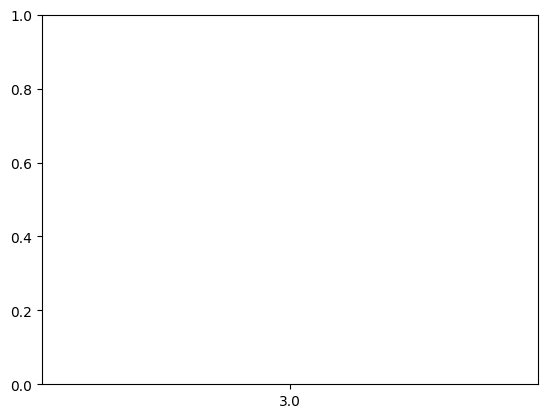

In [10]:
# Same as above but reveals more information (ie better)
sns.color_palette(palette='colorblind')
dyn_pal = {'3': 'plum', '4': 'g', '5': 'orange', '6': 'b', '7': 'r', '8': 'skyblue', 'FIP or 8': 'pink'}
plot = sns.boxplot(x='dynasty', y='width', data=dynasty_df, palette=dyn_pal)
plot.set_title("Average Width of Pyramids During Each Dynasty")
plot.set_xlabel("Dynasty")
plot.set_ylabel("Width")

In [12]:
# Testing a timeline plot
#plt.style.use('ggplot')
from matplotlib.pyplot import cm
import numpy as np

tl = df.sort_values(by='start_of_reign', ascending=False)

tl = tl[['ruler', 'start_of_reign', 'end_of_reign', 'length_of_reign']].dropna()
rulers = tl['ruler']
starts = -tl['start_of_reign']
ends = -tl['end_of_reign']
length = tl['length_of_reign']

# Figure
plt.figure(figsize=(12, 8))
color = cm.rainbow(np.linspace(0, 1, len(starts)))
plt.barh(y=0, 
         width=(ends - starts), 
         height=0.3, 
         left=starts, 
         color=color, 
         edgecolor='black')
# Tick settings
plt.tick_params(left=False, labelleft=False)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(10))
# Labeling
plt.xlabel('Year (BCE)')
plt.ylabel('Ruler')
plt.title('Lengths of Reign by Ruler')
# Vertical figure label lines
levels = np.tile([-2, 2, -1, 1], 
                 int(np.ceil(len(rulers) / 4)))[:len(rulers)]
plt.vlines(starts + length/2, 0, levels/2, color='black')
# Figure label text
for i in range(len(starts)):
    plt.text(starts.iloc[i] + length.iloc[i]/2, 
             (levels[i]*1.05)/2, 
             rulers.iloc[i], 
             ha='center', 
             fontsize = '7') 

KeyError: "['ruler'] not in index"

### Thoughts on above

- It might be worth considering if another graph (line graph?) could be overlayed atop something more or less like this. For example, this + a line graph of the height or mass of the pyramids over time.

### Issues

- I can't figure out how to reduce the length of the vertical label lines without ruining the proportion of the figure, 
and vice versa.

- Rainbow colors probably aren't the best for visual clarity. Each segment should have more contrast with respect to those on either side.